# CYCLISTIC BIKE SHARE COMPANY ANALYSIS
The case study is the capstone project of Google Data Analytics Proefssional Certificate course. Here I am working as a junior data analyst for Cyclistic Bike Share Company in Chicago. The director of marketing team believes the company’s future success depends on maximizing the number of annual memberships.
## Major Task 
Converting casual riders into annual members
## Questions
- How do members and casual riders differ in bike rides?
- Why will casual riders take to memberships?
- What strategies to use to convert casual riders into members?

In [2]:
# Importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# importing all the datasets of every month
jan_2021 = pd.read_csv('C:/Users/New/Downloads/Compressed/cycle share data/202101-divvy-tripdata.csv')
feb_2021 = pd.read_csv('C:/Users/New/Downloads/Compressed/cycle share data/202102-divvy-tripdata.csv')
mar_2021 = pd.read_csv('C:/Users/New/Downloads/Compressed/cycle share data/202103-divvy-tripdata.csv')
apr_2021 = pd.read_csv('C:/Users/New/Downloads/Compressed/cycle share data/202104-divvy-tripdata.csv')
may_2021 = pd.read_csv('C:/Users/New/Downloads/Compressed/cycle share data/202105-divvy-tripdata.csv')
june_2021 = pd.read_csv('C:/Users/New/Downloads/Compressed/cycle share data/202106-divvy-tripdata.csv')
july_2021 = pd.read_csv('C:/Users/New/Downloads/Compressed/cycle share data/202107-divvy-tripdata.csv')
aug_2021 = pd.read_csv('C:/Users/New/Downloads/Compressed/cycle share data/202108-divvy-tripdata.csv')
sep_2021 = pd.read_csv('C:/Users/New/Downloads/Compressed/cycle share data/202109-divvy-tripdata.csv')
oct_2021 = pd.read_csv('C:/Users/New/Downloads/Compressed/cycle share data/202110-divvy-tripdata.csv')
nov_2021 = pd.read_csv('C:/Users/New/Downloads/Compressed/cycle share data/202111-divvy-tripdata.csv')
dec_2021 = pd.read_csv('C:/Users/New/Downloads/Compressed/cycle share data/202112-divvy-tripdata.csv')


In [4]:
# merging all datasets into one and naming it as 'data'
data = pd.concat([jan_2021,feb_2021,mar_2021,apr_2021,may_2021,june_2021,july_2021,aug_2021,sep_2021,oct_2021,nov_2021,dec_2021])

In [5]:
# top 5 rows of dataframe 'data'
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [6]:
data.shape

(5595063, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 597.6+ MB


In [8]:
# changing datatype of relevant columns in one go
data = data.astype({'rideable_type':'category', 'member_casual': 'category', 'started_at':'datetime64', 'ended_at':'datetime64'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(2), datetime64[ns](2), float64(4), object(5)
memory usage: 522.9+ MB


In [9]:
# adding a new column 'trip duration' calculated as time difference between endtime and starttime
data['trip_duration'] = data['ended_at'] - data['started_at']
data['trip_duration'] 

0        0 days 00:10:25
1        0 days 00:04:04
2        0 days 00:01:20
3        0 days 00:11:42
4        0 days 00:00:43
               ...      
247535   0 days 00:19:13
247536   0 days 00:07:01
247537   0 days 00:08:17
247538   0 days 00:14:13
247539   0 days 00:03:37
Name: trip_duration, Length: 5595063, dtype: timedelta64[ns]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 14 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       category       
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       category       
 13  trip_duration       timedelta64[ns]
dtypes: category(2), datetime64[ns](2), float64(4), object(5), timedelta64[ns](1)
memory usage: 565.6+ MB


In [11]:
# extracting date from 'started_at' column
data['date'] = data['started_at'].dt.date
data['date'] 

0         2021-01-23
1         2021-01-27
2         2021-01-21
3         2021-01-07
4         2021-01-23
             ...    
247535    2021-12-12
247536    2021-12-06
247537    2021-12-02
247538    2021-12-13
247539    2021-12-13
Name: date, Length: 5595063, dtype: object

In [12]:
# changing the datatype of 'date' from object to datetime64
data['date'] = pd.to_datetime(data.date)
data.date

0        2021-01-23
1        2021-01-27
2        2021-01-21
3        2021-01-07
4        2021-01-23
            ...    
247535   2021-12-12
247536   2021-12-06
247537   2021-12-02
247538   2021-12-13
247539   2021-12-13
Name: date, Length: 5595063, dtype: datetime64[ns]

In [13]:
# extracting year from 'date' column and adding a new column named 'year'
data['year'] = pd.DatetimeIndex(data['date']).year

In [14]:
# extracting month name from date column and naming new column as month
data['month'] = data.started_at.dt.month_name()
data['month']

0          January
1          January
2          January
3          January
4          January
            ...   
247535    December
247536    December
247537    December
247538    December
247539    December
Name: month, Length: 5595063, dtype: object

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 17 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       category       
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       category       
 13  trip_duration       timedelta64[ns]
 14  date                datetime64[ns] 
 15  year                int64          
 16  month               object         
dtypes: category(2), datetime64[ns](3), float64(4), int64(1), object(6), timedelta64[ns](1)
memory usage: 693

In [16]:
# extracting dayname from date column and adding new column as 'day_name'; identifying unique values in day_name column
data['day_name'] = data['date'].dt.day_name()
data['day_name'].unique()

array(['Saturday', 'Wednesday', 'Thursday', 'Monday', 'Sunday', 'Friday',
       'Tuesday'], dtype=object)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 18 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       category       
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       category       
 13  trip_duration       timedelta64[ns]
 14  date                datetime64[ns] 
 15  year                int64          
 16  month               object         
 17  day_name            object         
dtypes: category(2), datetime64[ns](3), float64(4), int64(1), object

In [18]:
# changing datatype of month from object to category; ordered=False as these are not in an order
cat_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['month'] = pd.Categorical(data.month, categories = cat_month, ordered=False)


In [19]:
data.month

0          January
1          January
2          January
3          January
4          January
            ...   
247535    December
247536    December
247537    December
247538    December
247539    December
Name: month, Length: 5595063, dtype: category
Categories (12, object): ['January', 'February', 'March', 'April', ..., 'September', 'October', 'November', 'December']

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 18 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       category       
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       category       
 13  trip_duration       timedelta64[ns]
 14  date                datetime64[ns] 
 15  year                int64          
 16  month               category       
 17  day_name            object         
dtypes: category(3), datetime64[ns](3), float64(4), int64(1), object

In [21]:
# changing datatype of day_name from object to category; ordered=False as these are not in an order
cat_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['day_name'] = pd.Categorical(data.day_name, categories = cat_day, ordered = False)
data['day_name']

0          Saturday
1         Wednesday
2          Thursday
3          Thursday
4          Saturday
            ...    
247535       Sunday
247536       Monday
247537     Thursday
247538       Monday
247539       Monday
Name: day_name, Length: 5595063, dtype: category
Categories (7, object): ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 18 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       category       
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       category       
 13  trip_duration       timedelta64[ns]
 14  date                datetime64[ns] 
 15  year                int64          
 16  month               category       
 17  day_name            category       
dtypes: category(4), datetime64[ns](3), float64(4), int64(1), object

In [23]:
# extracting hour from started_at column and naming it as 'hour' column
data['hour'] = data['started_at'].dt.hour
data.hour

0         16
1         18
2         22
3         13
4          2
          ..
247535    13
247536    19
247537     8
247538     9
247539     8
Name: hour, Length: 5595063, dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 19 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       category       
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       category       
 13  trip_duration       timedelta64[ns]
 14  date                datetime64[ns] 
 15  year                int64          
 16  month               category       
 17  day_name            category       
 18  hour                int64          
dtypes: category(4), dateti

In [25]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,date,year,month,day_name,hour
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,0 days 00:10:25,2021-01-23,2021,January,Saturday,16
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,0 days 00:04:04,2021-01-27,2021,January,Wednesday,18
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,0 days 00:01:20,2021-01-21,2021,January,Thursday,22
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,0 days 00:11:42,2021-01-07,2021,January,Thursday,13
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,0 days 00:00:43,2021-01-23,2021,January,Saturday,2


In [26]:
# calculating the missing values and their % of total values
data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    690809
start_station_id      690806
end_station_name      739170
end_station_id        739170
start_lat                  0
start_lng                  0
end_lat                 4771
end_lng                 4771
member_casual              0
trip_duration              0
date                       0
year                       0
month                      0
day_name                   0
hour                       0
dtype: int64

In [27]:
data.shape

(5595063, 19)

In [28]:
739170/5595063

0.13211111295797742

In [29]:
# 13% of all values are null values, i decided to drop them
data.dropna(inplace=True)

In [30]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,date,year,month,day_name,hour
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,0 days 00:07:13,2021-01-24,2021,January,Sunday,19
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,0 days 00:04:32,2021-01-23,2021,January,Saturday,12
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,0 days 00:09:47,2021-01-09,2021,January,Saturday,15
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual,0 days 00:08:57,2021-01-09,2021,January,Saturday,15
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual,0 days 00:10:09,2021-01-24,2021,January,Sunday,15


In [31]:
# checking once again the null values
data.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
trip_duration         0
date                  0
year                  0
month                 0
day_name              0
hour                  0
dtype: int64

In [32]:
# checking for any duplicate value
data.duplicated().any()

False

In [33]:
data.duplicated().sum()

0

# Data Analysis

In [34]:
# statistical data about the trip duration of all data
data.trip_duration.describe()

count                      4588302
mean     0 days 00:21:48.637676421
std      0 days 03:04:25.503842186
min              -1 days +23:04:06
25%                0 days 00:06:57
50%                0 days 00:12:12
75%                0 days 00:22:07
max               38 days 20:24:09
Name: trip_duration, dtype: object

In [35]:
# calculating the -ve trip duration count and removing them
negative_rides = data.trip_duration < '0 days 00:00:00'
data[negative_rides].count()

ride_id               116
rideable_type         116
started_at            116
ended_at              116
start_station_name    116
start_station_id      116
end_station_name      116
end_station_id        116
start_lat             116
start_lng             116
end_lat               116
end_lng               116
member_casual         116
trip_duration         116
date                  116
year                  116
month                 116
day_name              116
hour                  116
dtype: int64

In [36]:
data[negative_rides].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,date,year,month,day_name,hour
39317,F79335E3A77A57B5,electric_bike,2021-03-29 15:41:21,2021-03-29 15:41:20,Ashland Ave & Belle Plaine Ave,13249,Ashland Ave & Belle Plaine Ave,13249,41.956133,-87.668981,41.956143,-87.668985,member,-1 days +23:59:59,2021-03-29,2021,March,Monday,15
120830,5D2797A8FFA71B49,classic_bike,2021-03-13 18:02:58,2021-03-13 18:02:57,Dayton St & North Ave,13058,Dayton St & North Ave,13058,41.910578,-87.649422,41.910578,-87.649422,casual,-1 days +23:59:59,2021-03-13,2021,March,Saturday,18
22361,BC53ECCBC76278FD,classic_bike,2021-04-07 16:11:33,2021-04-07 16:11:26,Ashland Ave & Grand Ave,13434,Ashland Ave & Grand Ave,13434,41.891072,-87.666611,41.891072,-87.666611,member,-1 days +23:59:53,2021-04-07,2021,April,Wednesday,16
292566,6E81034B446FC2FD,electric_bike,2021-04-23 09:43:39,2021-04-23 09:43:29,Dayton St & North Ave,13058,Dayton St & North Ave,13058,41.910638,-87.649372,41.910650,-87.649386,member,-1 days +23:59:50,2021-04-23,2021,April,Friday,9
292678,318DD838369AEA61,classic_bike,2021-04-30 10:56:32,2021-04-30 10:56:30,Dayton St & North Ave,13058,Dayton St & North Ave,13058,41.910578,-87.649422,41.910578,-87.649422,member,-1 days +23:59:58,2021-04-30,2021,April,Friday,10


In [37]:
data.drop(data[negative_rides].index, inplace=True)

In [38]:
# filtering trip duration for members 
member_only = data['member_casual'] == 'member'
data[member_only].trip_duration.describe()

count                      2539431
mean     0 days 00:13:11.022482989
std      0 days 00:17:32.901085710
min                0 days 00:00:00
25%                0 days 00:05:43
50%                0 days 00:09:43
75%                0 days 00:16:31
max                1 days 00:55:38
Name: trip_duration, dtype: object

In [39]:
# filtering trip duration for casual riders 
data[~member_only].trip_duration.describe()

count                      2048013
mean     0 days 00:32:30.635092648
std      0 days 04:34:58.555432792
min                0 days 00:00:00
25%                0 days 00:09:30
50%                0 days 00:16:39
75%                0 days 00:30:39
max               38 days 20:24:09
Name: trip_duration, dtype: object

In [40]:
# calculating mode for users
mode_day_users = data.day_name.mode()
mode_day_users

0    Saturday
Name: day_name, dtype: category
Categories (7, object): ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [41]:
# calculating mode for members
mode_day_member = data[data['member_casual'] == 'member']
mode_day_member = mode_day_member.day_name.mode()
mode_day_member

0    Wednesday
Name: day_name, dtype: category
Categories (7, object): ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [42]:
# calculating mode for casual riders
mode_day_casual = data[data['member_casual'] == 'casual']
mode_day_casual = mode_day_casual.day_name.mode()
mode_day_casual

0    Saturday
Name: day_name, dtype: category
Categories (7, object): ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [43]:
# no of rides of users grouped by day name
user_count = data.groupby('day_name').ride_id.count()
user_count

day_name
Monday       575326
Tuesday      602976
Wednesday    615732
Thursday     597585
Friday       655709
Saturday     825264
Sunday       714852
Name: ride_id, dtype: int64

In [44]:
# no of rides of members grouped by day name
member_ride_count = data[data['member_casual'] == 'member'].groupby('day_name').ride_id.count()
member_ride_count

day_name
Monday       346428
Tuesday      388071
Wednesday    397618
Thursday     373416
Friday       365711
Saturday     357020
Sunday       311167
Name: ride_id, dtype: int64

In [45]:
# no of rides of casual riders grouped by day name
casual_ride_count = data[data['member_casual'] == 'casual'].groupby('day_name').ride_id.count()
casual_ride_count

day_name
Monday       228898
Tuesday      214905
Wednesday    218114
Thursday     224169
Friday       289998
Saturday     468244
Sunday       403685
Name: ride_id, dtype: int64

# Visualizations

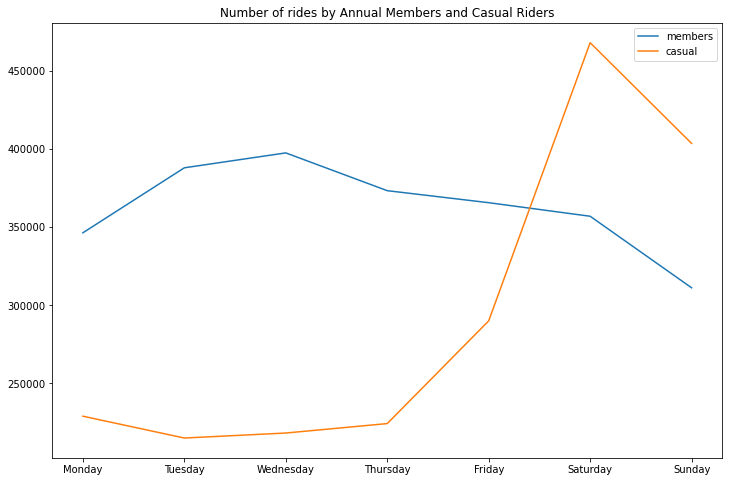

In [46]:
# plot the graph for number of rides by annual members and casual riders
plt.figure(figsize = (12,8))
plt.plot(member_ride_count.index, member_ride_count.values)
plt.plot(casual_ride_count.index, casual_ride_count.values)
plt.title('Number of rides by Annual Members and Casual Riders')
plt.legend(['members', 'casual'])
plt.show()

#### From this graph it is inferred that- 
- number of rides for casual riders significantly increases on Fridays, Saturdays and Sundays. 
- For members, number of rides drop on weekends. 
- Overall on weekdays members have higher ride count than casual riders.

In [47]:
# number of users of each type
user_type = data['member_casual'].value_counts()
user_type

member    2539431
casual    2048013
Name: member_casual, dtype: int64

Text(0.5, 1.0, 'Number of users of each type')

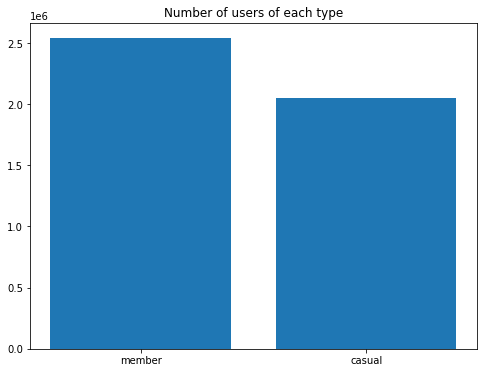

In [48]:
# plot the graph for number of users of each type
plt.figure(figsize= (8,6))
plt.bar(user_type.index, user_type.values)
plt.title('Number of users of each type')

Text(0.5, 1.0, 'Percentage of users in each type')

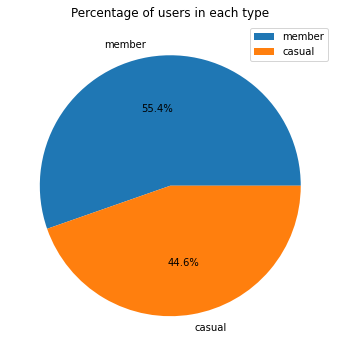

In [49]:
# plot pie chart showing % of users on each category
plt.figure(figsize = (9,6))
plt.pie(user_type.values, labels= user_type.index, autopct= '%1.1f%%')
plt.legend(['member', 'casual'])
plt.title('Percentage of users in each type')

In [50]:
# no of rides by all users by month
user_count_month = data.groupby('month').ride_id.count()
user_count_month

month
January       83489
February      42982
March        205640
April        298145
May          450897
June         608681
July         692212
August       674307
September    621045
October      477877
November     255840
December     176329
Name: ride_id, dtype: int64

In [51]:
# no of rides by members by month
member_ride_count_month = data[data['member_casual'] == 'member'].groupby('month').ride_id.count()
member_ride_count_month

month
January       68801
February      34370
March        130016
April        177752
May          234112
June         304537
July         322856
August       332880
September    328152
October      288797
November     185890
December     131268
Name: ride_id, dtype: int64

In [52]:
# no of rides by casual riders by month
casual_ride_count_month = data[data['member_casual'] == 'casual'].groupby('month').ride_id.count()
casual_ride_count_month

month
January       14688
February       8612
March         75624
April        120393
May          216785
June         304144
July         369356
August       341427
September    292893
October      189080
November      69950
December      45061
Name: ride_id, dtype: int64

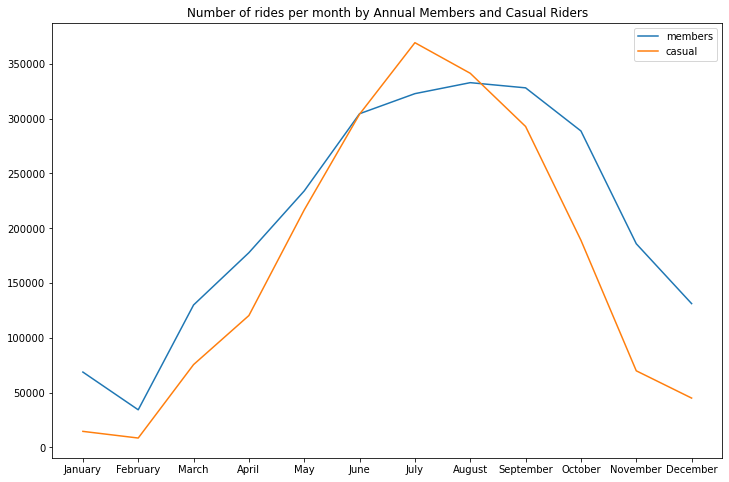

In [53]:
# plot the graph - no of rides per month by annual members and casual riders
plt.figure(figsize = (12,8))
plt.plot(member_ride_count_month.index, member_ride_count_month.values)
plt.plot(casual_ride_count_month.index, casual_ride_count_month.values)
plt.title('Number of rides per month by Annual Members and Casual Riders')
plt.legend(['members', 'casual'])

#### From this graph it is infered that - 
- total rides rise during summer  season
- total rides fall during winter season, lowest in february
- casual riders have higher rides in summer season

In [54]:
# no of rides per hour by all users
user_count_hour = data.groupby('hour').ride_id.count()
user_count_hour

hour
0      67549
1      47022
2      28553
3      15321
4      12681
5      34383
6      91025
7     166367
8     199266
9     169097
10    190744
11    239350
12    280395
13    286385
14    288265
15    318299
16    384583
17    469550
18    404567
19    296168
20    204275
21    159954
22    134967
23     98678
Name: ride_id, dtype: int64

In [55]:
# no of rides per hour by members
member_ride_count_hour = data[data['member_casual'] == 'member'].groupby('hour').ride_id.count()
member_ride_count_hour

hour
0      25236
1      16360
2       8976
3       5104
4       5995
5      25562
6      71625
7     130349
8     149594
9     108215
10    105427
11    126925
12    146986
13    144152
14    142058
15    165043
16    216641
17    273616
18    228338
19    161154
20    106312
21     77257
22     58559
23     39947
Name: ride_id, dtype: int64

In [56]:
# no of rides per hour by casual riders
casual_ride_count_hour = data[data['member_casual'] == 'casual'].groupby('hour').ride_id.count()
casual_ride_count_hour

hour
0      42313
1      30662
2      19577
3      10217
4       6686
5       8821
6      19400
7      36018
8      49672
9      60882
10     85317
11    112425
12    133409
13    142233
14    146207
15    153256
16    167942
17    195934
18    176229
19    135014
20     97963
21     82697
22     76408
23     58731
Name: ride_id, dtype: int64

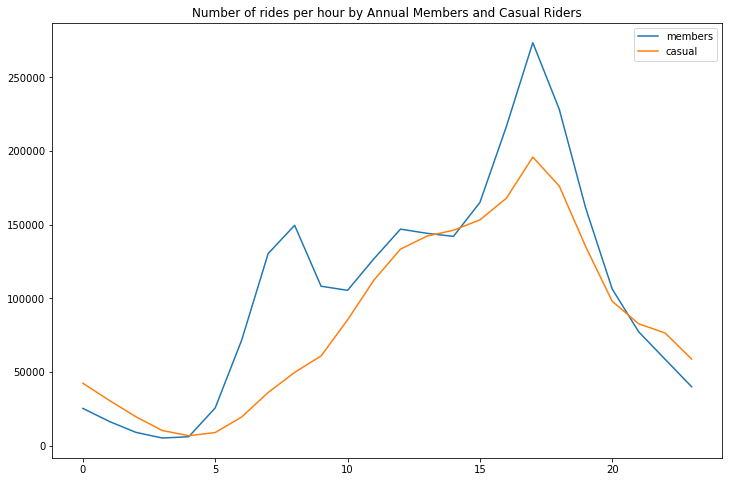

In [57]:
# plot the graph - no of rides per hour by annual members and casual riders
plt.figure(figsize = (12,8))
plt.plot(member_ride_count_hour.index, member_ride_count_hour.values)
plt.plot(casual_ride_count_hour.index, casual_ride_count_hour.values)
plt.title('Number of rides per hour by Annual Members and Casual Riders')
plt.legend(['members', 'casual'])

#### Frpm this graph it is inferred -
- spike in rides in evening for all users
- members have spike in morning and evening
- in morning casual riders are way less than members

In [58]:
data.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,date,year,month,day_name,hour
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member,0 days 00:07:13,2021-01-24,2021,January,Sunday,19
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member,0 days 00:04:32,2021-01-23,2021,January,Saturday,12
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual,0 days 00:09:47,2021-01-09,2021,January,Saturday,15


In [59]:
user_trip_duration_overall = data.groupby('member_casual').trip_duration.mean()
user_trip_duration_overall

member_casual
casual   0 days 00:32:30.635092648
member   0 days 00:13:11.022482989
Name: trip_duration, dtype: timedelta64[ns]

Text(0.5, 1.0, 'Overall average trip duration of user type')

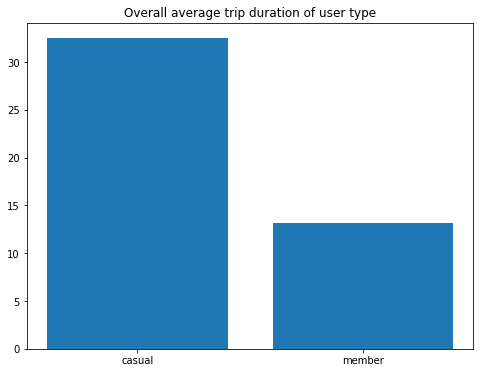

In [60]:
# plot bar chart - overall avg trip duration by user type
plt.figure(figsize= (8,6))
plt.bar(user_trip_duration_overall.index, user_trip_duration_overall.values/pd.Timedelta(minutes=1))
plt.title('Overall average trip duration of user type')

#### Inference from above graph-
- average trip duration of casual riders is more than double of members

In [61]:
# avg trip duration per day by all users
user_avg_trip_duration_day = data.groupby('day_name').trip_duration.mean()
user_avg_trip_duration_day

day_name
Monday      0 days 00:20:38.878588834
Tuesday     0 days 00:18:14.297945523
Wednesday   0 days 00:18:03.538635315
Thursday    0 days 00:18:13.650349322
Friday      0 days 00:20:48.576697894
Saturday    0 days 00:26:11.803202369
Sunday      0 days 00:27:50.981617173
Name: trip_duration, dtype: timedelta64[ns]

In [62]:
# avg trip duration per day by members
member_avg_trip_duration_day = data[data['member_casual'] == 'member'].groupby('day_name').trip_duration.mean()
member_avg_trip_duration_day

day_name
Monday      0 days 00:12:43.518309720
Tuesday     0 days 00:12:23.223956440
Wednesday   0 days 00:12:27.483320674
Thursday    0 days 00:12:21.218391820
Friday      0 days 00:12:47.563775768
Saturday    0 days 00:14:49.105277015
Sunday      0 days 00:15:11.692814469
Name: trip_duration, dtype: timedelta64[ns]

In [63]:
# avg trip duration per day by casual riders
casual_avg_trip_duration_day = data[data['member_casual'] == 'casual'].groupby('day_name').trip_duration.mean()
casual_avg_trip_duration_day

day_name
Monday      0 days 00:32:38.317425228
Tuesday     0 days 00:28:48.260087015
Wednesday   0 days 00:28:16.161585226
Thursday    0 days 00:28:00.724083169
Friday      0 days 00:30:55.173008089
Saturday    0 days 00:34:52.336969614
Sunday      0 days 00:37:36.253843962
Name: trip_duration, dtype: timedelta64[ns]

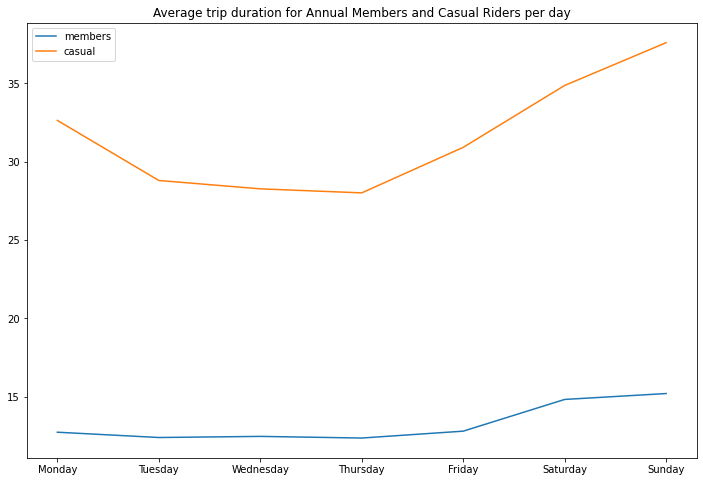

In [64]:
# plot the graph - avg trip duration per day by annual members and casual riders
plt.figure(figsize = (12,8))
plt.plot(member_avg_trip_duration_day/pd.Timedelta(minutes=1))
plt.plot(casual_avg_trip_duration_day/pd.Timedelta(minutes=1))
plt.title('Average trip duration for Annual Members and Casual Riders per day')
plt.legend(['members', 'casual'])

#### Inference from above graph -
- overall trip duration for casual riders is way more than members
- for members there is slight increase in trip duration on weekends
- for casual riders there significant increase in trip duration during weekends

In [65]:
# avg trip duration per month by all users
user_avg_trip_duration_month = data.groupby('month').trip_duration.mean()
user_avg_trip_duration_month

month
January     0 days 00:14:33.206218783
February    0 days 00:21:15.877437066
March       0 days 00:22:47.556428710
April       0 days 00:24:01.656707306
May         0 days 00:26:30.140978981
June        0 days 00:26:19.325145683
July        0 days 00:24:11.605736392
August      0 days 00:21:09.252040984
September   0 days 00:20:11.133587743
October     0 days 00:17:40.337963534
November    0 days 00:14:06.292252970
December    0 days 00:14:13.567342864
Name: trip_duration, dtype: timedelta64[ns]

In [66]:
# avg trip duration per month by members
member_avg_trip_duration_month = data[data['member_casual'] == 'member'].groupby('month').trip_duration.mean()
member_avg_trip_duration_month

month
January     0 days 00:12:01.821659568
February    0 days 00:14:46.886208903
March       0 days 00:13:39.984301932
April       0 days 00:14:15.797774427
May         0 days 00:14:20.556165425
June        0 days 00:14:08.366569579
July        0 days 00:13:47.442469707
August      0 days 00:13:33.190233717
September   0 days 00:13:07.864855310
October     0 days 00:12:00.847619608
November    0 days 00:10:57.113540265
December    0 days 00:10:34.868200932
Name: trip_duration, dtype: timedelta64[ns]

In [67]:
# avg trip duration per month by casual riders
casual_avg_trip_duration_month = data[data['member_casual'] == 'casual'].groupby('month').trip_duration.mean()
casual_avg_trip_duration_month

month
January     0 days 00:26:22.316312636
February    0 days 00:47:08.319205759
March       0 days 00:38:28.965738389
April       0 days 00:38:26.637204820
May         0 days 00:39:38.039403095
June        0 days 00:38:31.228230706
July        0 days 00:33:17.190093026
August      0 days 00:28:33.897175677
September   0 days 00:28:05.356191510
October     0 days 00:26:18.868706367
November    0 days 00:22:29.028934953
December    0 days 00:24:50.663700317
Name: trip_duration, dtype: timedelta64[ns]

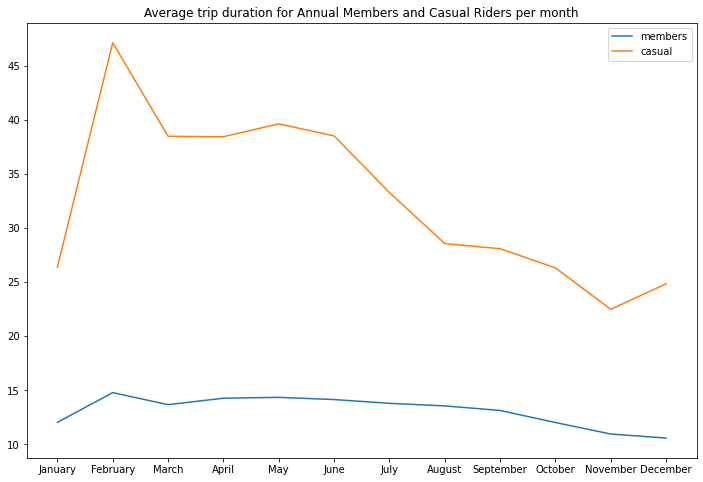

In [68]:
# plot the graph - avg trip duration per month by annual members and casual riders
plt.figure(figsize = (12,8))
plt.plot(member_avg_trip_duration_month/pd.Timedelta(minutes=1))
plt.plot(casual_avg_trip_duration_month/pd.Timedelta(minutes=1))
plt.title('Average trip duration for Annual Members and Casual Riders per month')
plt.legend(['members', 'casual'])

#### Inference from above graph -
- overall trip duration for casual riders is way more than members
- for members trip duration is low in winter months of november and december, highest in february
- for casual rirders trip duration is low in winter months and highest in february
- for february month, trip duration is highest but number of rides is lowest

In [69]:
q = data.groupby(['rideable_type', 'member_casual']).ride_id.count()
q

rideable_type  member_casual
classic_bike   casual           1261331
               member           1980041
docked_bike    casual            312003
               member                 1
electric_bike  casual            474679
               member            559389
Name: ride_id, dtype: int64

Text(0, 0.5, 'No. of Rides')

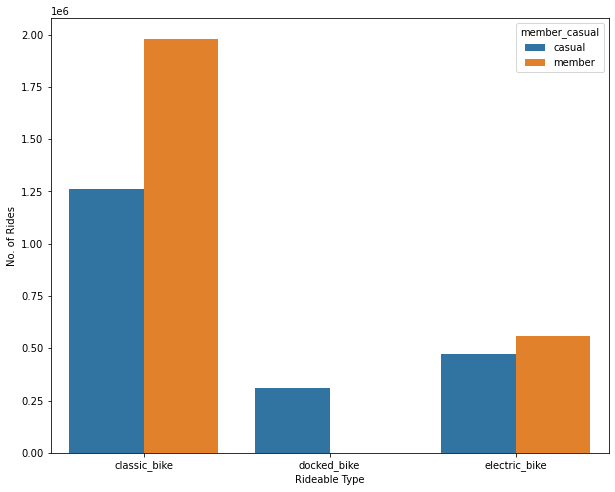

In [70]:
# plot bar graph - no of rides each user type undertakes on rideable type
plt.figure(figsize=(10,8))
sns.countplot(data = data, x = 'rideable_type', hue = 'member_casual')
plt.xlabel('Rideable Type')
plt.ylabel('No. of Rides')

#### Inference from above graph -
- members use the bikes more overall
- members do not use the docked bikes

# Observations Summary
 - Members have more trips than casual riders in the year 2021.
 - Average trip duraiton for casual riders is more than members on all days. It appears that members prefer bike share services more for work commute; casual riders may prefer for exercise, entertainment and fun.
 - Peak activity is found during evening hours for both members and casual riders. Also members have a spike in activity in morning 8 am, which shows that members use it for work commute.
 - Summer season has highest rides for both user types in months of june, july and august. The activity decreases in the winter season.
 - High activity is found on weekends for both users. Casual riders see a massive jump on weekends, whereas members use the services consistently throughout the week.
 - Classic bikes are more preferred by both user types. But docked type is not at all used by members.

# Recommendations
- Promote memberships on quarterly, monthly and weekly basis. But keep the annual memberships lower than twelve months cumulative. This will help convert casual riders to members.
- Rewards and discounts on weekends (busy days) for members only.
- Preferential access during rush hours i.e. evening times.
- Promote memberships for casual riders on weekdays to encourage their memberships.
- Offer discounted plans for families and friends of members to encourage taking memberships.
- Marketing campaigns to showcase benefits of cycling.
- Marketing campaigns to showcase discounted memberships for casual riders at stations.
- Feedback from members and casual riders regarding their experience and what can be improved.
